# ***Capstone Project*** - Real Estate Image Processing

## 1. **Download images** for *room type* (*kitchen*)


**Using Google Image Download** <br>
- *Link*: https://github.com/Joeclinton1/google-images-download

EDIT: You can only download up to 100 images!

In [127]:
#-----in Anaconda Prompt
##pip uninstall google_images_download 

#-----install git package in Python
##conda install git

In [128]:
#-----install new package of google_images_download
##pip install git+https://github.com/Joeclinton1/google-images-download.git

In [129]:
#from google_images_download import google_images_download   #importing the library
#response = google_images_download.googleimagesdownload()   #class instantiation
#arguments = {"keywords":"Kitchen","limit":100,"print_urls":True}   #creating list of arguments
#paths = response.download(arguments)   #passing the arguments to the function
#print(paths)   #printing absolute paths of the downloaded images

**Using Simple Image Download** <br>
- *Link*: https://github.com/RiddlerQ/simple_image_download

EDIT: This package downloads the first 70 images, i.e. up to the last picture in the Google Search without scrolling down, for as many images you ask. If you want 700 images, you'll get 10 *copies* of the *same* 70 images!

In [130]:
#-----install package to download images at one go
##pip install simple_image_download

> We will download up to `1500` images for each room type in Real Estate. Some images have a URL error and will not return the images. In this case, we download extra images and then delete the unsuccessful ones. In here, we download *Kitchen*.

In [ ]:
from simple_image_download import simple_image_download as simp

response = simp.simple_image_download
#download different types of kitchen to: avoid duplicates and give a broader context

num_images = 80
kitchen_list = ['open kitchen', 'classic kitchen', 'old kitchen', 'marble kitchen', 'luxury kitchen',
               'wood kitchen', 'oak kitchen', 'devol kitchen', 'shaker kitchen', 'mushroom kitchen',
               'retro kitchen', 'backsplash kitchen', 'mosaic kitchen', 'metal kitchen', 'rustic kitchen'
               'transitional kitchen', 'beach kitchen', 'eclectic kitchen', 'craftsman kitchen', 
               'farmhouse kitchen', 'mediterranean kitchen', 'industrial kitchen', 'scandinavian kitchen', 
               'midcentury modern kitchen', 'shabby chic kitchen', 'southwest kitchen']

for name in kitchen_list:
    response().download(name, num_images)

#print(response().urls('kitchen', 1))

### ii. Move all the images in different folders to one folder: *Room type* (*Kitchen*)

In [ ]:
def fast_scandir(dirname):
    
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]  
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
        
    return subfolders

In [ ]:
#importing os module
import os 

#specify the path of the parent directory
parent_dir = 'C:/Users/chris/Desktop/simple_images/'

#scan and return the path of all the folders in the parent directory
kitchen_dirs = fast_scandir(parent_dir)

In [ ]:
#Python program to create directory using os.mkdir() method
  
#name the directory
directory = 'kitchen'
  
#specify the path of the parent directory
parent_dir = 'C:/Users/chris/Desktop/simple_images/'
  
#specify path of the new directory
path = os.path.join(parent_dir, directory)
  
#create the directory 'kitchen'
os.mkdir(path)

print("Directory '% s' created" % directory)

In [ ]:
#Python program to copy all files from different kitchen directories into one folder: 'kitchen'

import shutil
import os

#specify path of the destination directory
dest_dir = parent_dir + directory

for scr_dir in kitchen_dirs:
    file_names = os.listdir(scr_dir)
    
    for file_name in file_names:
        shutil.move(os.path.join(scr_dir, file_name), dest_dir)

### iii. Remove duplicated and non-representative images

#### a. Remove duplicates

**Using difPy** <br>
- *Project Link*: https://pypi.org/project/difPy/ <br/>
- *Towards Data Science Link*: https://towardsdatascience.com/finding-duplicate-images-with-python-71c04ec8051

**IMPORTANT**:
- Set `delete=True` to *automatically delete* the lower resolution duplicate images.
- Set `silent_del=True` to *skip user confirmation* for deleting images.
- Run `search.result` to get dictionary of duplicates/similar images that were *found*.
- Run `search.lower_quality` to get list of duplicates/similar images that have the *lowest quality*.

In [ ]:
#-----install an image hashing library
##pip install imagehash

In [ ]:
#-----install difPy to not go through all images in a folder and compare them manually to check if they are duplicates
##pip install difPy

In [ ]:
from difPy import dif

search = dif('C:/Users/chris/Desktop/simple_images/kitchen')

In [ ]:
#TO RUN A CHECK BEFORE RUNNING THE ABOVE CODE BUT WITH DELETIONS (as below)

#initialize lists 
num_duplicates = []
images = []
duplicates = []

#create loop to get values for the lists above
for index in range(len(search.result)):
    images.append(list(search.result.values())[index]['location'])
    num_duplicates.append(len(list(search.result.values())[index]['duplicates']))
    duplicates.append(list(search.result.values())[index]['duplicates'])

#import pandas
import pandas as pd

#initialize data of lists
data = {'image': images, 
       'number_of_duplicates': num_duplicates,
       'duplicates': duplicates}

#create data frame
df = pd.DataFrame(data)
df

> We checked the data frame and that the images selected above as duplicates were indeed duplicates. <br/>
We checked *3* duplicates to confirm **difPy** is working and decided to go ahead and delete all.

In [ ]:
search = dif('C:/Users/chris/Desltop/simple_images/kitchen', 
             delete=True, 
             silent_del=True)

> At this stage there were *202 images* found to be duplicated and hence were **deleted** from our image list. <br/>
> But to be *extremely cautious*, we will check the *remaining* images manually and delete anything that may **not** represent a kitchen.

#### b. Remove non-representatives

> We then manually found another *117* images that were **not** representative of a *kitchen*, and therefore, we deleted them *manually*.

#### Same process in 1. was done for all other relevant room types.

## 2. Train-Validation-Test Split

**Using split-folders** <br>
- *Project Link*: https://pypi.org/project/split-folders/ <br/>
- *Youtube Link*: https://www.youtube.com/watch?v=C6wbr1jJvVs&t=49s
- *Stackoverflow Link*: https://stackoverflow.com/questions/69701114/how-to-split-folder-with-images-into-train-val-and-test

In [2]:
#-----install an library to split images into training and test folders
##pip install split-folders
##pip install split-folders[full]

### i. Create folder *train_test_split* as output folder

In [1]:
import os

#name the output directory
output_folder = 'train_test_split'
  
#specify the path of the parent directory
parent_dir = 'C:/Users/chris/Desktop/'

#specify path of the new directory
path = os.path.join(parent_dir, output_folder)

#create the directory 'kitchen'
os.mkdir(path)

#directory to which the train test images will be copied to
output_folder = parent_dir + 'train_test_split/'

### ii. Run train-test split on input folder

In [3]:
import splitfolders

#directory from which we will obtain the images to do training/test split
input_folder = 'Real_Estate_Images'

#split with a ratio and to only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`

splitfolders.ratio(input_folder, 
                   output=output_folder,
                   seed=1337, 
                   ratio=(.8, .2), 
                   group_prefix=None, 
                   move=False) #default values

Copying files: 6269 files [03:54, 26.69 files/s] 


## 3. Data Preprocessing

### i. Augmenting training and test images using ImageDataGenerator

In [ ]:
#-----installing the platform tensorflow for deep learning
##pip install tensorflow

In [2]:
import tensorflow as tf
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.8.0'

In [3]:
data_generator = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

train_generator = data_generator.flow_from_directory('C:/Users/chris/Desktop/train_test_split/train',
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'categorical', 
                                                 color_mode = 'grayscale')

test_generator = data_generator.flow_from_directory('C:/Users/chris/Desktop/train_test_split/val',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'categorical', 
                                            color_mode = 'grayscale')

Found 5001 images belonging to 6 classes.
Found 1255 images belonging to 6 classes.


### ii. Splitting the train and test into images and its corresponding labels

In [4]:
from tqdm import tqdm
import numpy as np

batch_size = 1

# Store the data in X_train, y_train variables by iterating over the batches
train_generator.reset()
X_train, y_train = next(train_generator)
for i in tqdm(range(int(len(train_generator)/batch_size)-1)): #1st batch is already fetched before the for loop
    img, label = next(train_generator)
    X_train = np.append(X_train, img, axis=0)
    y_train = np.append(y_train, label, axis=0)
print(X_train.shape, y_train.shape)

# Store the data in X_test, y_test variables by iterating over the batches
test_generator.reset()
X_test, y_test = next(test_generator)
for i in tqdm(range(int(len(test_generator)/batch_size)-1)): # 1st batch is already fetched before the for loop
    img, label = next(test_generator)
    X_test = np.append(X_test, img, axis=0)
    y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

  1%|█                                                                               | 68/5000 [00:10<07:53, 10.42it/s]C:\Users\chris\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [18:13<00:00,  4.57it/s]


(5001, 64, 64, 1) (5001, 6)


100%|██████████████████████████████████████████████████████████████████████████████| 1254/1254 [04:56<00:00,  4.23it/s]

(1255, 64, 64, 1) (1255, 6)


### iii. Reshape the dimension of train and test images and de-one hot encode labels

In [6]:
# Get the different class names
class_names = list(train_generator.class_indices.keys())

# There are 5001 training samples in real estate images 
num_train, height, width, batch_size  = X_train.shape

# There are 1255 test samples from our real estate images
num_test = X_test.shape[0]

# Reshaping the dimension of X_train and X_test to 2D
X_train = X_train.reshape(num_train, height*width, )
X_test = X_test.reshape(num_test, height*width, )
depth=1

# Get the number of classes
num_classes = np.unique(train_generator.labels).shape[0]

# Making sure that the values are consistent across all elements in the array
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

# Convert the one-hot encoded labels to the corresponding actual label number
Y_train = np.where(y_train == 1)[1]
Y_test = np.where(y_test == 1)[1]

## 4. Explore transformed images

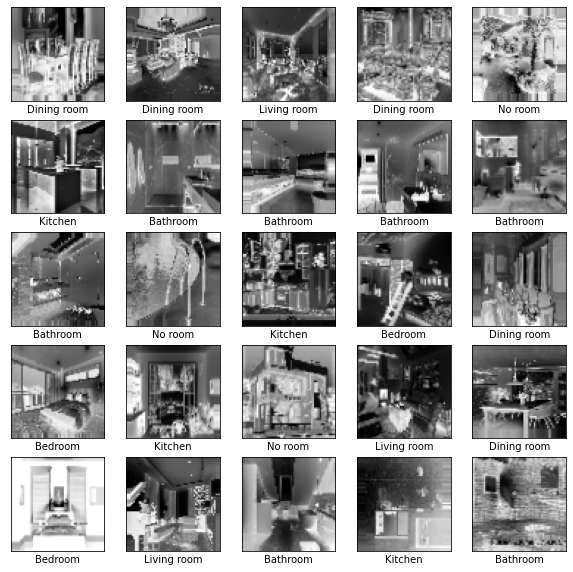

In [7]:
# Show a specific subset of our classes as B&W pictures
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((64,64)), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

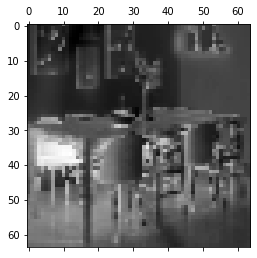

In [9]:
# Checking a specific image within the target size specified
i = 100
plt.matshow(X_train[i].reshape((64,64)),cmap=plt.cm.binary)
plt.show()

## 5. Define function to plot history of accuracy throughout model

In [ ]:
import matplotlib.pylab as plt

# Defining a function to plot the accuracy as the number of epochs increases
def plot_history(histories):
    for (history,name) in histories:
        plt.plot(history.history['accuracy'],'o-',label  = name+' train')
        plt.plot(history.history['val_accuracy'],'o--',label  = name+' test')

        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
    plt.show()

    for (history,name) in histories:
        plt.plot(history.history['loss'],'o-',label  = name+' train')
        plt.plot(history.history['val_loss'],'o--',label  = name+' test')

        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(loc='upper left')
    plt.show()

## 6. Convulutional Neural Network

### i. Create and run the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 6)         60        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 6)         330       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1176)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

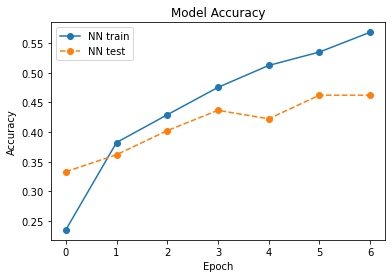

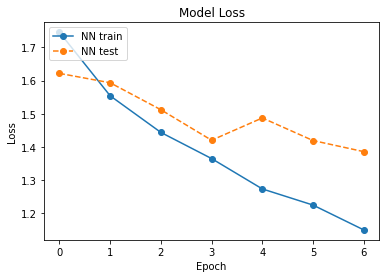

In [11]:
##### Create a model to classify the 6 classes

# Import the libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, Flatten, MaxPooling2D

# Define the parameters

kernel_size = (3, 3)
epochs = 7

# Create the model

# Callback to stop the training when there is no improvement in the loss for three consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Convolutional layer
model = Sequential()
model.add(Conv2D(num_classes, kernel_size, activation='relu', input_shape = (height, width, depth))) # model.add(MaxPooling2D())
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second convolutional layer
model.add(Conv2D(num_classes, kernel_size, activation='relu', input_shape = (height, width, depth)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
model.add(Flatten())

# Full Connection layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))
            
# Print the summary of the model
model.summary()

# Compile the model: loss and optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Train the model
X_train = X_train.reshape(num_train,height,width,1)
X_test = X_test.reshape(num_test,height,width,1)
history_CNN = model.fit(X_train, y_train, batch_size = 32, epochs = epochs, callbacks = [callback], 
                        validation_data = (X_test, y_test))

# Evaluate the model using the test set
score = model.evaluate(X_test, y_test,verbose=0)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

# Plot the learning curves
plot_history([(history_CNN, 'NN')])

### ii. Show probability distributions and class accuracies

In [125]:
# Define a function to get key from value in dictionary
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
                return key

# Check the predictions made against the test set
predictions = model.predict(X_test)

# Print the array of the probability of belonging to each class
predictions = np.around(predictions,2)

# Get the predicted label for each sample in the test set
predicted_label = np.argmax(predictions, axis=1)

# Create the pandas DataFrame
import pandas as pd
df = pd.DataFrame(predictions, columns = list(train_generator.class_indices.keys()))

# Add predicted labelt to DataFrame
df['Predicted Label'] = list(map(lambda x: get_key(train_generator.class_indices, x), list(predicted_label)))
df['True Label'] = list(map(lambda x: get_key(train_generator.class_indices, x), list(Y_test)))

# Style the DataFrame
df_styled = df.style.apply(lambda x: (x != df['True Label']).map({True: 'color: red', False: 'color: green'}), 
                    subset=['Predicted Label'])

#Get the accuracy per class and the total accuracy of model
list_of_classes = [0, 1, 2, 3, 4, 5]

acc = [0 for c in list_of_classes]
for c in list_of_classes:
    acc[c] = ((predicted_label == Y_test) * (Y_test == c)).sum() / (Y_test == c).sum()
    print(get_key(train_generator.class_indices, c) + ' Accuracy: ' + str(round(acc[c],2)))
    
total_acc = ((predicted_label) == (Y_test)).sum() / len(Y_test)
print()
print('The total accuracy of the model is: ' + str(round(total_acc,2)))

# Print df or df_styled
df_styled

Bathroom Accuracy: 0.63
Bedroom Accuracy: 0.25
Dining room Accuracy: 0.42
Kitchen Accuracy: 0.34
Living room Accuracy: 0.62
No room Accuracy: 0.55

The total accuracy of the model is: 0.47


,Bathroom,Bedroom,Dining room,Kitchen,Living room,No room,Predicted Label,True Label
0,0.010000,0.070000,0.360000,0.180000,0.180000,0.200000,Dining room,Bathroom
1,0.070000,0.080000,0.510000,0.020000,0.310000,0.010000,Dining room,Living room
2,0.190000,0.350000,0.020000,0.080000,0.250000,0.110000,Bedroom,Living room
3,0.350000,0.280000,0.060000,0.050000,0.250000,0.010000,Bathroom,Living room
4,0.290000,0.080000,0.120000,0.440000,0.040000,0.030000,Kitchen,Dining room
5,0.800000,0.060000,0.010000,0.080000,0.040000,0.000000,Bathroom,Bedroom
6,0.830000,0.050000,0.020000,0.040000,0.050000,0.000000,Bathroom,Bathroom
7,0.460000,0.350000,0.030000,0.020000,0.140000,0.000000,Bathroom,Kitchen
8,0.040000,0.490000,0.040000,0.030000,0.270000,0.140000,Bedroom,No room
9,0.000000,0.000000,0.950000,0.010000,0.030000,0.010000,Dining room,Dining room


### iii. Visualize and highlight the (in)correctly classified images

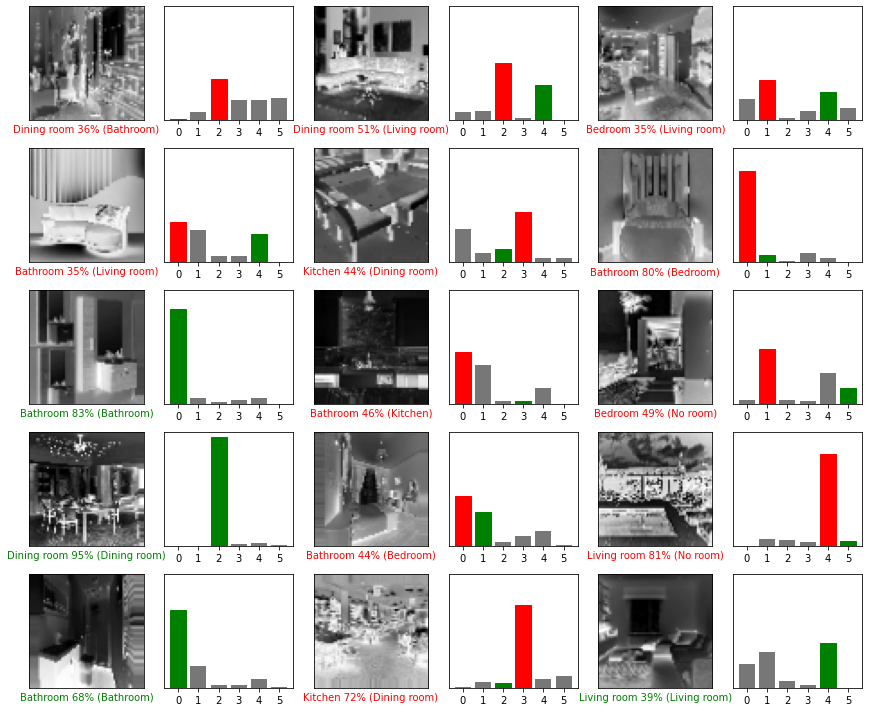

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    true_label = true_label.argmax()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((64, 64)), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                            100*np.max(predictions_array),
                            class_names[true_label]),
                            color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    true_label = true_label.argmax()
    plt.grid(False)
    plt.xticks(range(6))
    plt.yticks([])
    thisplot = plt.bar(range(6), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### iv. Save the model into dir 'real_estate_model' to connect with interface

In [ ]:
model.save('C:/Users/chris/Desktop/real_estate_model')

## 7. Predictions

In [54]:
# Import libraries
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image and do necessary transformations
test_image = image.load_img('C:/Users/chris/Downloads/maria_bathroom.jfif', target_size = (64, 64), color_mode = 'grayscale')
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# Predict the image
result = model.predict(test_image)
result = list(np.where(result == 1)[1])[0]
get_key(train_generator.class_indices, result)

'Living room'

## 8. Load model saved in 6iv

In [ ]:
model = tf.keras.models.load_model('C:/Users/chris/Desktop/real_estate_model')

## 9. Build visual interface

In [132]:
### Here we build a visual interface for the user to choose an image to predict its room type.